Conectamos y cargamos la tabla con

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Parámetros de conexión
user = "coniitic_registro"
password = "G3!+GUyN-1bXP+]x"
host = "localhost"
database = "coniitic_registro"

engine = create_engine(
    f"mysql+pymysql://{user}:{password}@{host}/{database}"
)

# Consulta (cambia el nombre si tu tabla no se llama regeventos)
query = "SELECT * FROM regeventos"

df = pd.read_sql(query, engine)

df.head()


,id,qr_Acceso,nombres,apellidos,email,telefono,tipo_documento,num_documento,genero,pais,ucatolica,rol,programa,profesion,nom_Evento,qr_validado,fecha_uso,fecha_registro
0,4,OXL3IHNL6KFN8KGPQE,yenny,hernandez,jphernandez@ucatolica.edu.co,3168232187,CC,1024486270,Femenino,Colombia,S,Administrativo,Facultad de Ingeniería,Adminsitradora financiera,Del reto a la solución: Innovar con Design Thi...,1,2025-10-01 15:05:30,2025-09-30 13:58:57
1,5,5RBN17AAE2OOL47485,Diego Fernando,Meléndez Suárez,dfmelendez@ucatolica.edu.co,3183530817,CC,91284150,Masculino,Colombia,S,Profesor/Administrativo,Esp. en Ingeniería de Pavimentos,Ingeniero Civil,Workshop: Diseños de mezcla de concreto bajo l...,0,NaT,2025-09-30 18:15:53
2,6,R2SV7WXIAQ63Y1GIL3,Diego Fernando,Meléndez Suárez,dfmelendez@ucatolica.edu.co,3183530817,CC,91284150,Masculino,Colombia,S,Profesor/Administrativo,Esp. en Ingeniería de Pavimentos,Ingeniero Civil,Conferencia : Arquitectura y diseño sostenible...,0,NaT,2025-09-30 18:31:52
3,7,P58X4OTXBNFUAQIJ54,Diego Fernando,Meléndez Suárez,dfmelendez@ucatolica.edu.co,3183530817,CC,91284150,Masculino,Colombia,S,Profesor/Administrativo,Esp. en Ingeniería de Pavimentos,Ingeniero Civil,Conferencia: Proyectos comprometidos con la so...,0,NaT,2025-09-30 18:32:43
4,8,MK8DW21CHVHXTGBAS5,Oscar Raul,Pinto Celis,orpinto@ucatolica.edu.co,3125812914,CC,91500261,Masculino,Colombia,S,Profesor/Administrativo,Esp. en Gerencia de Obras,Ingeniero Civil,Conferencia: Premio Nacional de Ingeniería: Re...,1,2025-10-02 14:05:02,2025-09-30 18:32:53


In [3]:
import sys
print(sys.executable)


C:\Users\jparedes\Desktop\coniiti-analytics\venv\Scripts\python.exe


Una vez Conectado con el siguiente comando le decimos a ptyhon que nos muestra cuantas filas y colmnas tiene nuestra tabla.

In [4]:
df.shape

(2440, 18)

In [5]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              2440 non-null   int64         
 1   qr_Acceso       2440 non-null   str           
 2   nombres         2440 non-null   str           
 3   apellidos       2440 non-null   str           
 4   email           2440 non-null   str           
 5   telefono        2440 non-null   str           
 6   tipo_documento  2440 non-null   str           
 7   num_documento   2440 non-null   str           
 8   genero          2440 non-null   str           
 9   pais            2440 non-null   str           
 10  ucatolica       2440 non-null   str           
 11  rol             2440 non-null   str           
 12  programa        2440 non-null   str           
 13  profesion       2440 non-null   str           
 14  nom_Evento      2440 non-null   str           
 15  qr_validado    

Obtener el número de valores nulos (missing values) por cada columna de un DataFrame.

Desglose del comando:

•	df: Es el DataFrame (tabla de datos) sobre el que estás trabajando.
•	.isnull(): Crea una máscara booleana (DataFrame con valores True/False) donde True indica que el valor es nulo (NaN, None, etc.) y False que no lo es.
•	.sum(): Suma todos los valores True (que se tratan como 1) en cada columna.

Es muy útil en análisis exploratorio de datos (EDA) para:

Identificar rápidamente qué columnas tienen datos faltantes

Decidir cómo manejar esos valores nulos (eliminarlos, imputarlos, etc.)

Evaluar la calidad de los datos antes de aplicar modelos de machine learning

Un comando similar pero con funcionalidad opuesta es df.notnull().sum(), que cuenta los valores no nulos.



In [6]:
df.isnull().sum()


id                  0
qr_Acceso           0
nombres             0
apellidos           0
email               0
telefono            0
tipo_documento      0
num_documento       0
genero              0
pais                0
ucatolica           0
rol                 0
programa            0
profesion           0
nom_Evento          0
qr_validado         0
fecha_uso         596
fecha_registro      0
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False)


fecha_uso         596
id                  0
qr_Acceso           0
nombres             0
email               0
apellidos           0
tipo_documento      0
num_documento       0
genero              0
telefono            0
pais                0
ucatolica           0
programa            0
rol                 0
profesion           0
nom_Evento          0
qr_validado         0
fecha_registro      0
dtype: int64

In [8]:
df['qr_validado'].value_counts(dropna=False)

qr_validado
1    1842
0     598
Name: count, dtype: int64

In [9]:
df['qr_validado'].value_counts(normalize=True) * 100


qr_validado
1    75.491803
0    24.508197
Name: proportion, dtype: float64

In [10]:
pd.crosstab(df['programa'], df['qr_validado'], normalize='index') * 100

qr_validado,0,1
programa,,
,55.555556,44.444444
ADMINISTRACION DE EMPRESAS,0.000000,100.000000
Administra de empresas,0.000000,100.000000
Administracion de Empresas,0.000000,100.000000
Administracion de empresas,100.000000,0.000000
Administración,0.000000,100.000000
Administración de empresas,0.000000,100.000000
Administración de empresas,11.111111,88.888889
Ciencia Básicas,0.000000,100.000000


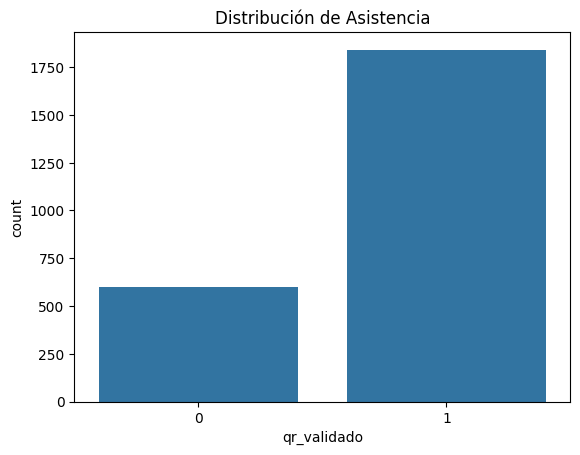

In [11]:
sns.countplot(data=df, x='qr_validado')
plt.title("Distribución de Asistencia")
plt.show()